The objective of this method is to experiment with the Gradient Bandit Algorithm method  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_reward (true_action_values, action): 
    return np.random.normal(true_action_values[action], 1)

In [ ]:
k = 10 
A = [0.1, 0.2, 0.5, 0.7]
nb_runs = 1000
steps = 2000

def Gradient_bandit (k, a , nb_runs, steps):
    #initialize the action values following a normal distribution 
    true_action_values = np.random.normal(0, 1, k)
    #initialize the optimal action as the action with the highest true action value
    optimal_action = np.argmax(true_action_values)

    #initializr the average rewards and optimal actions percentage across all runs 
    avg_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)

    for i in range(nb_runs): 
        #initialize the action preferences to 0 for all actions 
        H = np.zeros(k)
        #initialize the action probabilities 
        pi = np.ones(k) / k
        rewards = 0
        for j in range(steps):
            action = np.random.choice(k, p=pi)
            reward = get_reward(true_action_values, action)
            rewards += reward
            for act , _ in enumerate(H):
                if act == action:
                    H[act] = H[act] + a * ((reward - (rewards/steps)) * (1 - pi[act]))
                else: 
                    H[act] = H[act] - a * ((reward - (rewards/steps)) * pi[act])

            pi = np.exp(H)/ np.sum(np.exp(H))

            if action == optimal_action : 
                optimal_actions[j] += 1/nb_runs
            avg_rewards[j] += reward/ nb_runs

    #ploting
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    axs[0].plot(range(steps), avg_rewards, label=f"a={a}")
    axs[0].set_title('Average Reward vs. Number of Steps')
    axs[0].set_xlabel('Number of Steps')
    axs[0].set_ylabel('Average Reward')
    axs[0].legend()

    axs[1].plot(range(steps), optimal_actions, label=f"a={a}")
    axs[1].set_title('% Optimal Action vs. Number of Steps')
    axs[1].set_xlabel('Number of Steps')
    axs[1].set_ylabel('% Optimal Action')
    axs[1].legend()

    plt.show()

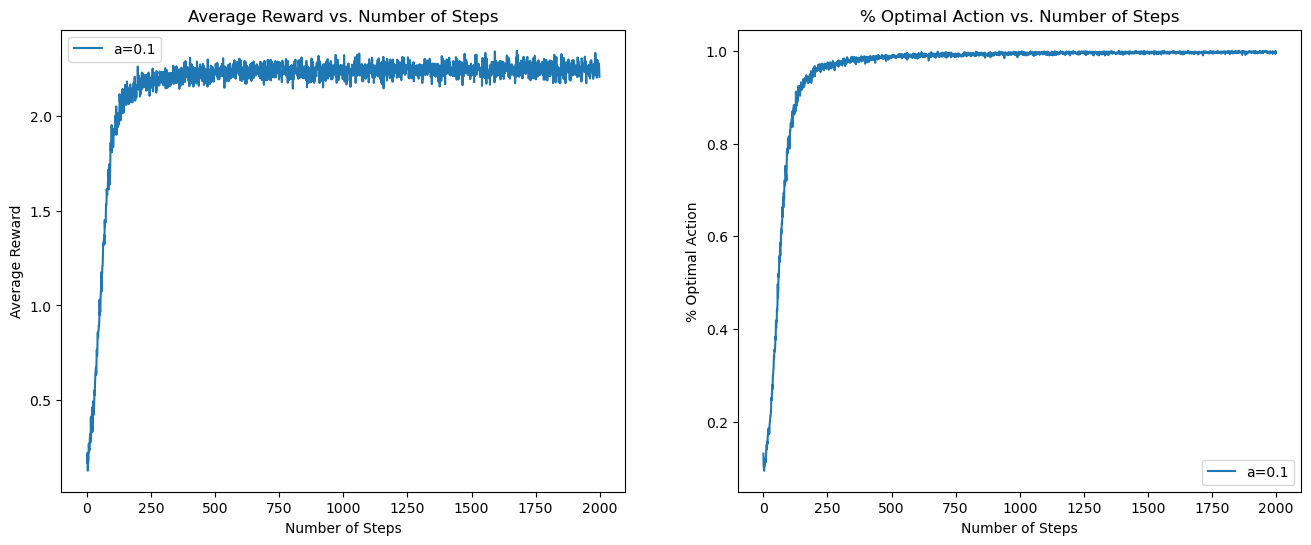

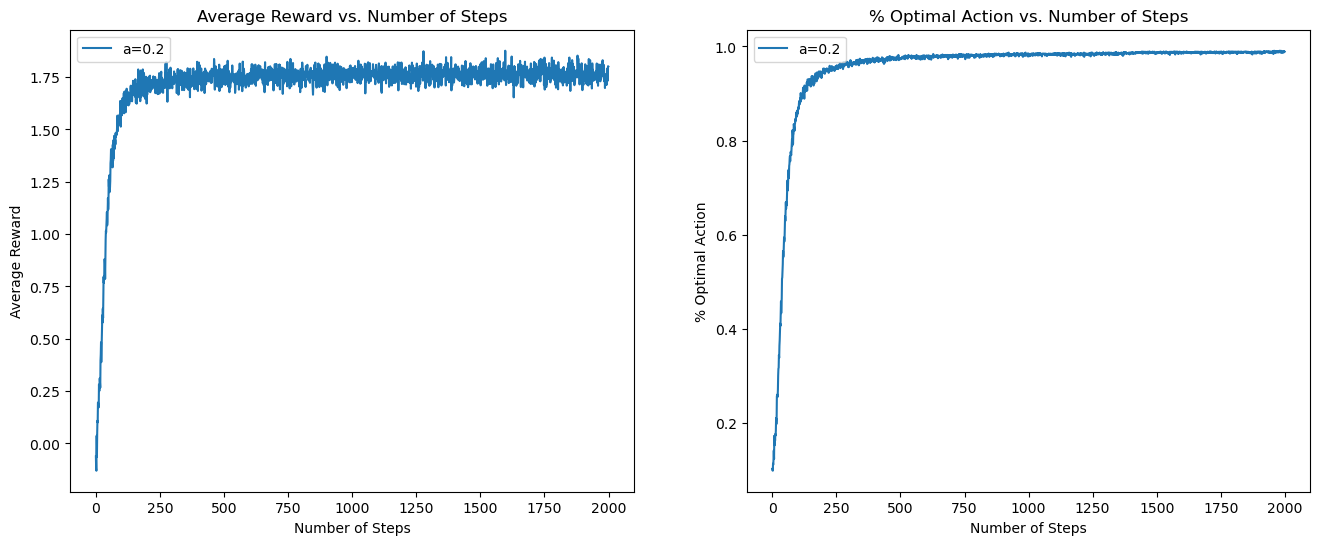

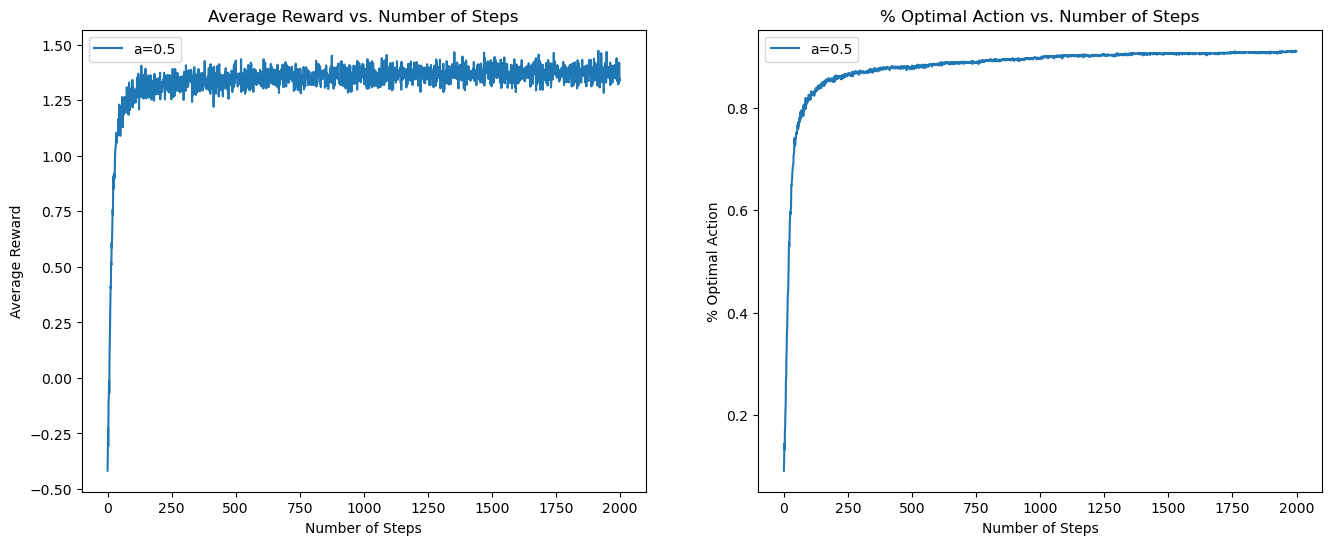

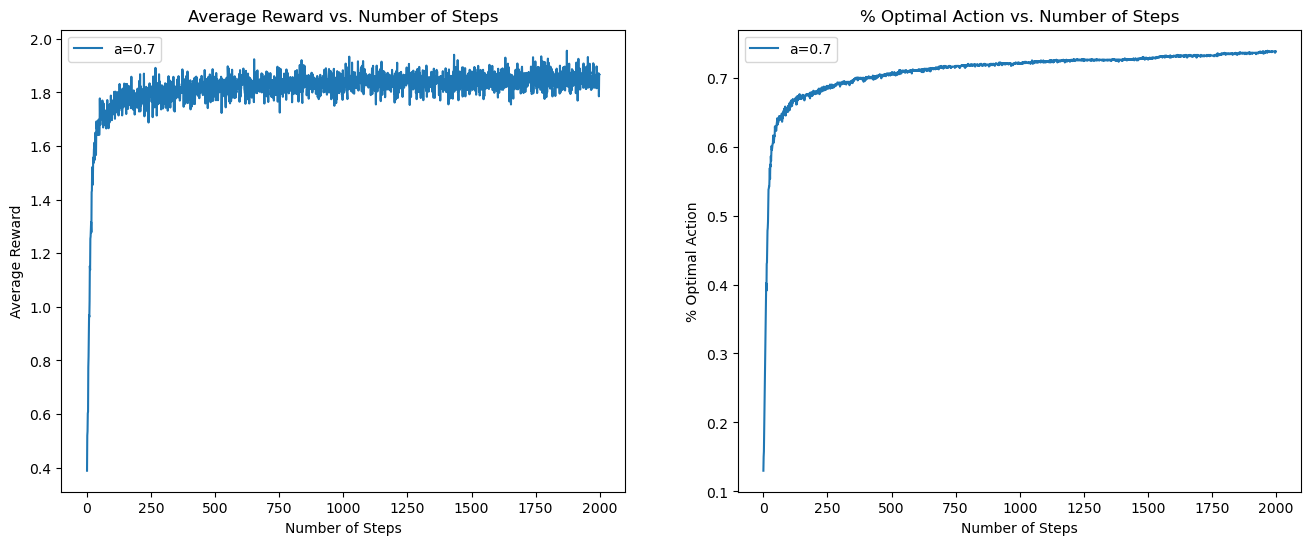

In [18]:
for a in A: 
    Gradient_bandit(k, a, nb_runs, steps)

Interpretation: 
- We notice that with higher values of alpha the model tends to do more exploitation, and the lower the alpha values get the more exploration is done. 
- And due to that, the models that do more exploration (lower alpha) tend to converge later but with higher optimal values. (and vice versa with higher alpha values)